In [1]:
%pylab inline
import scipy.optimize as opt
import scipy.stats as st
from mpl_toolkits import mplot3d

Populating the interactive namespace from numpy and matplotlib


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 28
         Function evaluations: 55
0.5375621108105403 0.34441847632406264


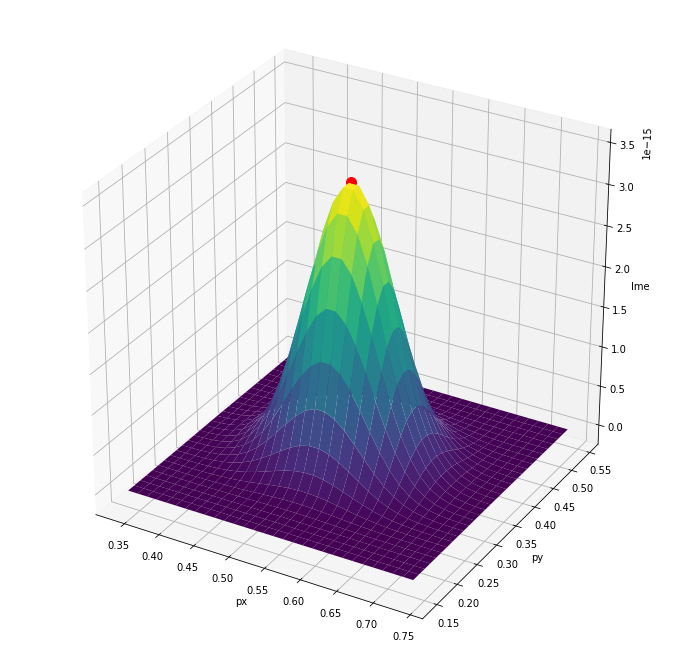

In [75]:
X = [2, 5, 5, 6, 8, 9, 3, 5]
Y = [1, 4, 5, 7, 9, 5]

nx = 10
ny = 15
def LME(ps):
    px, py = ps
    return np.prod(st.binom.pmf(X, nx, px)) * np.prod(st.binom.pmf(Y, ny, py))
    #return np.sum(st.binom.logpmf(X, nx, px)) + np.sum(st.binom.logpmf(Y, ny, py))

px_init = np.mean(X)/nx
py_init = np.mean(Y)/ny
px = np.linspace(px_init-0.2, px_init+0.2, 30)
py = np.linspace(py_init-0.2, py_init+0.2, 30)
lme = np.array([np.array([LME([kx,ky]) for kx in px]) for ky in py])

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d');

x, y = np.meshgrid(px, py)
ax.plot_surface(x, y, lme, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
#ax.plot_wireframe(x, y, lme, color='blue', lw=0.3);

px_opt, py_opt = opt.fmin(lambda ps: -LME(ps), [0.5, 0.5])
print(px_opt, py_opt)
ax.scatter3D(px_opt, py_opt, LME([px_opt, py_opt]), color='red', s=100);
ax.set_xlabel('px')
ax.set_ylabel('py')
ax.set_zlabel('lme');

In [50]:
np.mean(Y)/10

0.4625